In [1]:
import pandas as pd
df=pd.read_csv('data/NVDA.csv')

In [2]:
df.head(3).T

,0,1,2
Date,1999-01-22,1999-01-25,1999-01-26
Open,1.75,1.77083,1.83333
High,1.95312,1.83333,1.86979
Low,1.55208,1.64062,1.64583
Close,1.64062,1.8125,1.67188
Adj Close,1.50841,1.66644,1.53714
Volume,67867200,12762000,8580000


In [36]:
import numpy as np, pandas as pd
import glob, re

dfs = { re.search('/([^/\.]*)\.csv', fn).group(1):pd.read_csv(fn) for fn in glob.glob('./data/*.csv')}
print('data frames read:{}'.format(list(dfs.keys())))

print('local variables with the same names are created.')
for k, v in dfs.items(): locals()[k] = v

data frames read:['datatable', 'datatable2', 'NVDA', 'GCF', 'JPM', 'SPY']
local variables with the same names are created.


In [37]:
type(dfs)

pandas.core.frame.DataFrame

In [5]:
dfs.keys()

dict_keys(['data-table2', 'NVDA', 'GCF', 'JPM', 'SPY', 'data-table'])

In [38]:
datatable.head().T

,0,1,2,3,4
Laikotarpis,2021M03,2021M02,2021M02,2021M02,2021M01
Rodiklis,Nuolatinių gyventojų skaičius mėnesio pradžioje,Nuolatinių gyventojų skaičius mėnesio pradžioje,Mėnesinis gyvų gimusių kūdikių skaičius,Mėnesinis mirusiųjų skaičius,Nuolatinių gyventojų skaičius mėnesio pradžioje
Matavimo vienetai,asmenys,asmenys,asmenys,asmenys,asmenys
Reikšmė,2790044,2792155,1624,3740,2795175


In [39]:
datatable.head().T

,0,1,2,3,4
Laikotarpis,2021M03,2021M02,2021M02,2021M02,2021M01
Rodiklis,Nuolatinių gyventojų skaičius mėnesio pradžioje,Nuolatinių gyventojų skaičius mėnesio pradžioje,Mėnesinis gyvų gimusių kūdikių skaičius,Mėnesinis mirusiųjų skaičius,Nuolatinių gyventojų skaičius mėnesio pradžioje
Matavimo vienetai,asmenys,asmenys,asmenys,asmenys,asmenys
Reikšmė,2790044,2792155,1624,3740,2795175


In [18]:
NVDA.head().T

,0,1,2,3,4
Date,1999-01-22,1999-01-25,1999-01-26,1999-01-27,1999-01-28
Open,1.75,1.77083,1.83333,1.67708,1.66667
High,1.95312,1.83333,1.86979,1.71875,1.67708
Low,1.55208,1.64062,1.64583,1.58333,1.65104
Close,1.64062,1.8125,1.67188,1.66667,1.66146
Adj Close,1.50841,1.66644,1.53714,1.53235,1.52757
Volume,67867200,12762000,8580000,6109200,5688000
diff,-0.109375,0.041667,-0.161458,-0.010416,-0.005209


<AxesSubplot:xlabel='Date'>

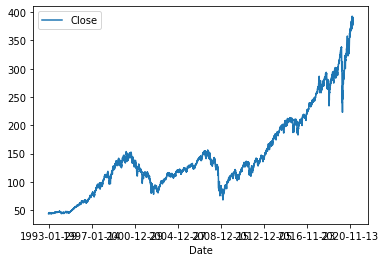

In [22]:
from matplotlib import pyplot
tseries = NVDA[["Date", "Close"]]
tseries.plot("Date")

<AxesSubplot:xlabel='Date'>

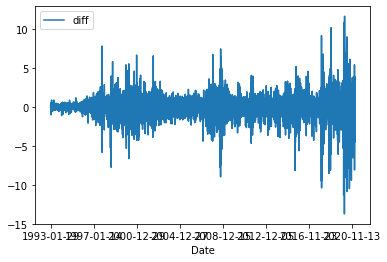

In [23]:
NVDA["diff"] = NVDA["Close"] - NVDA["Open"]
tseries2 = NVDA[["Date", "diff"]]
tseries2.plot("Date")

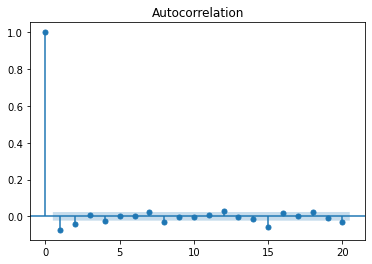

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(tseries2["diff"], lags = 20)
pyplot.show()

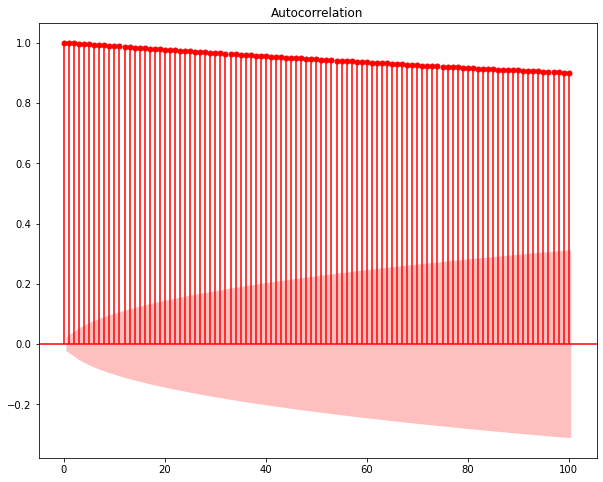

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.collections import PolyCollection

#sample data from their website
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

curr_fig, curr_ax = plt.subplots(figsize=(10, 8))

my_color="red"
#change the color of the vlines
sm.graphics.tsa.plot_acf(tseries[["Close"]].values.squeeze(), lags=100, ax=curr_ax, color=my_color, vlines_kwargs={"colors": my_color})
#get polygon patch collections and change their color
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

In [26]:
tseries2[["diff"]].values.squeeze()

array([-0.03125 ,  0.28125 ,  0.125   , ..., -2.940003,  1.320007,
       -0.110015])

In [27]:
import datetime as dt
tseries2['Date'] = pd.to_datetime(tseries2['Date'])

include = tseries2[tseries2['Date'].dt.year >= 2014]
exclude = tseries2[tseries2['Date'].dt.year < 2014]

<ipython-input-27-ee442a654f18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tseries2['Date'] = pd.to_datetime(tseries2['Date'])


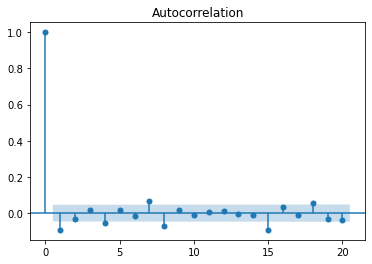

In [28]:
plot_acf(include["diff"].abs(), lags = 20)
pyplot.show()

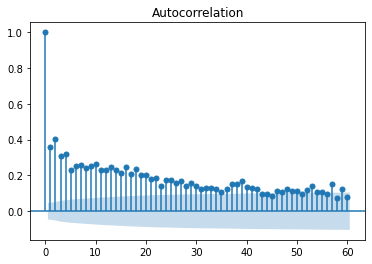

In [34]:
plot_acf(include["diff"].abs(), lags = 60)
pyplot.show()

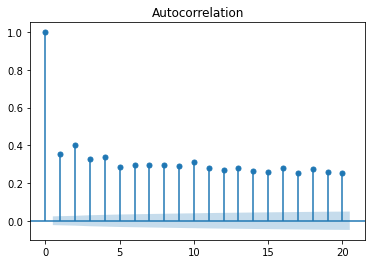

In [29]:
plot_acf(tseries2["diff"].abs(), lags = 20)
pyplot.show()

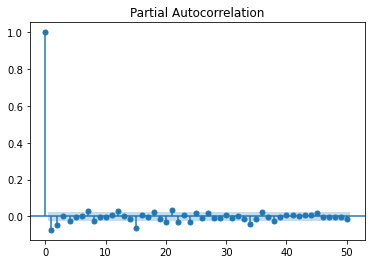

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(tseries2["diff"], lags=50)
pyplot.show()

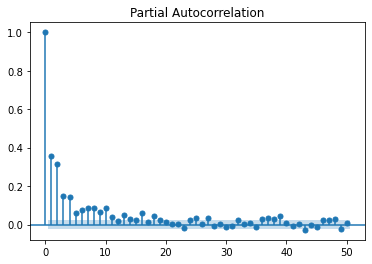

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(tseries2["diff"].abs(), lags=50)
pyplot.show()